In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Part 1: Data Preparation
# Data loading
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# List dataframe data types
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# Remove the Myopic Column
labels = df_myopia['MYOPIC']
df_myopia = df_myopia.drop(columns=["MYOPIC"], axis =1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 
                                                'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR','COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR','MOMMY', 'DADMY']])
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [8]:
# A list of the columns from the original DataFrame
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [9]:
# Saving cleaned data
file_path = Path("Resources/myopia_cleaned.csv")
df_myopia.to_csv(file_path, index=False)

In [10]:
# Part 2: Applying Dimensionality reduction with PCA
# Initialise PCA model
pca = PCA(n_components=0.9)

# Get the principal components for the data.
myopia_pca = pca.fit_transform(df_myopia)

In [11]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


In [12]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

In [13]:
# Initialise t-SNE model
tsne = TSNE(learning_rate= 35)

In [14]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\bhara\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [15]:

tsne_features.shape

(618, 2)

In [16]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

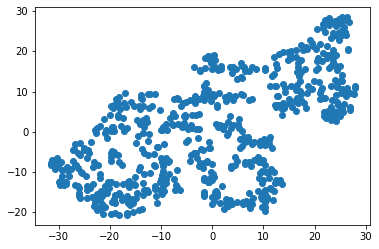

In [17]:
# Visualise the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [18]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

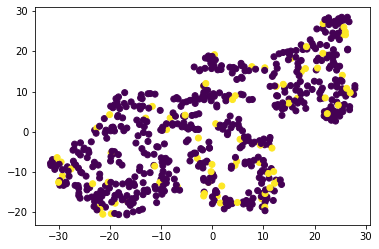

In [19]:
# Visualise the clusters with colour
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=labels)
plt.show()

In [20]:
#Part 3: Perform a Cluster Analysis with K-means
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\bhara\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361


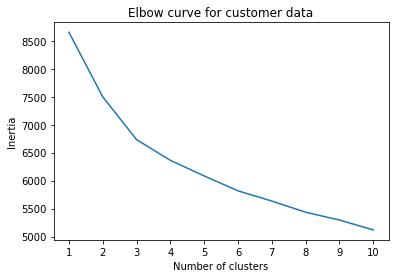

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [22]:
pca_k = PCA(n_components=0.9)
k_pca = pca_k.fit_transform(scaled_data)

In [23]:
df_myopia_k_pca = pd.DataFrame(
    data=k_pca, columns=["pc 1", "pc 2","pc 3", "pc 4", "pc 5", "pc 6", "pc 7", "pc 8", "pc 9", "pc 10"]
)
df_myopia_k_pca['class'] = km.labels_
df_myopia_k_pca.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,9
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


In [24]:
pca_k.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [29]:
# Initialize the K-Means model with n_clusters 10
model = KMeans(n_clusters=10, random_state=0)

# Train the model
model.fit(df_myopia_k_pca)

# Predict clusters
predictions = model.predict(df_myopia_k_pca)

# Add predicted clusters (labels) to DataFrame
df_myopia_k_pca['class'] = model.labels_

# Plot the Clusters
fig = px.scatter_3d(
    df_myopia_k_pca,
    x="pc 1",
    y="pc 2",
    z="pc 3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

### Summary and Conclusion:
Using PCA and tsne, the data could not be clustered.
Hence cluster analysis using kmeans was done.The elbow curve between intertia and number of customers could not determine the number of customers where the curve converges.
To obtain a variance ratio of 0.9, number of clusters required were 10.
Using 10 clusters, when the 3dimensional graph was plotted, the clusters could not be identified clearly.
Hence, clustering of the patient's data couldnot be achieved.